# CNN Model for Fashion MNIST dataset

Here you will implement a Convolutional Neural Network on the Fashion MNIST Dataset. You can download the dataset [here](https://github.com/zalandoresearch/fashion-mnist/tree/master/data)

Head over to [this cell](#5) to complete the Neural Network. Subsequently, train the model on the trainnig set, plot the accuracy and loss, make predicitons on the test set and plot the confusion matrix.

## Let's take a look at the dataset!

<img src="https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/embedding.gif" alt="cce" border="0">

<img src="https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png" alt="cce" border="0">

### Contents
* [Introduction](#1)
* [Loading the Data Set](#2)
* [Normalization, Reshape and Label Encoding](#3)
* [Train-Test Split](#4)
* [Convolutional Neural Network(Implementing with Keras)](#5)
* [Define Optimizer](#6)
* [Compile Model](#7)
* [Epochs and Batch Size](#8)
* [Data Augmentation](#9)
* [Fit the Model](#10)
* [Evaluate the model](#11)
* [Predict For Random Sample](#12)
* [Reading,Resizing and Testing the test image](#13)
* [Confusion Matrix](#14)
* [Conclusion](#15)

<a id="1"></a> <br>
# INTRODUCTION
* **In this kernel, we will be working on Fashion MNIST Dataset (Implementing with Keras).**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./Fashion_MNIST"))

# Any results you write to the current directory are saved as output.

['fashion-mnist_test.csv', 'fashion-mnist_train.csv', 't10k-images-idx3-ubyte', 't10k-labels-idx1-ubyte', 'train-images-idx3-ubyte', 'train-labels-idx1-ubyte']


<a id="2"></a> <br>
## Loading the Data Set
* **In this part we load and visualize the data.**

In [2]:
#reading train dataset
train = pd.read_csv("./Fashion_MNIST/fashion-mnist_train.csv")
print(train.shape)

(60000, 785)


In [3]:
# let's look at first five train samples
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* **For example,let's look at first sample pixel values**

In [4]:
train.iloc[0].value_counts()

0      306
213     21
207     20
210     20
208     17
      ... 
137      1
135      1
129      1
123      1
179      1
Name: 0, Length: 126, dtype: int64

In [5]:
# reading test dataset
test = pd.read_csv("./Fashion_MNIST/fashion-mnist_test.csv")
print(test.shape)

(10000, 785)


In [6]:
# put labels into Y_train variable
Y_train = train["label"].values
# Drop 'label' column
X_train = train.drop(labels = ["label"], axis = 1)

In [7]:
# put labels into Y_test variable
Y_test = test["label"].values
# Drop 'label' column
X_test = test.drop(labels = ["label"], axis = 1)

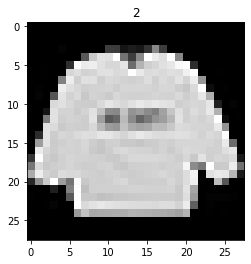

In [8]:
# plot some samples
plt.figure(figsize=(4,4))
plt.title(Y_train[0])
plt.imshow(X_train.values.reshape(-1,28,28)[0],cmap="gray")

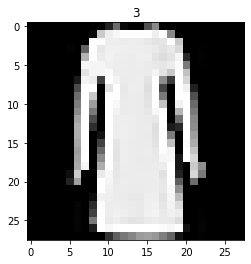

In [9]:
# plot some samples
plt.figure(figsize=(4,4))
plt.title(Y_train[17])
plt.imshow(X_train.values.reshape(-1,28,28)[17],cmap="gray")

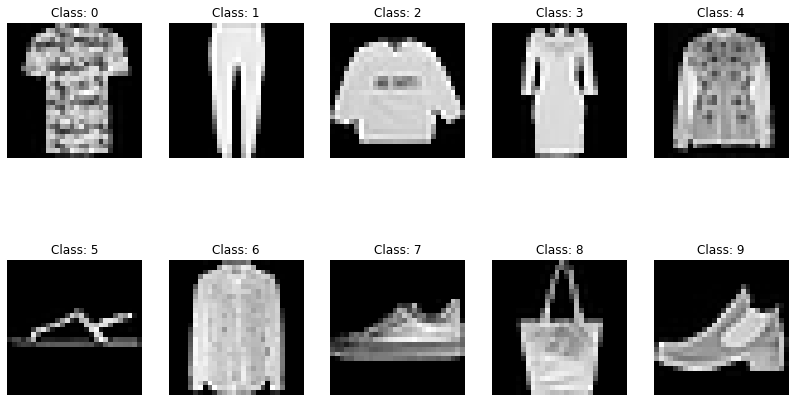

In [10]:
plt.figure(figsize = (14,8))

for i in range(10):
    plt.subplot(2, 5, i+1)
    img = train[train.label == i].iloc[0, 1:].values
    img = img.reshape((28,28))
    plt.imshow(img, cmap='gray')
    plt.title("Class: " + str(i))
    plt.axis('off')
    
plt.show()

<a id="3"></a> <br>
## Normalization, Reshape and Label Encoding 
* **Normalization**
    * We perform a grayscale normalization to reduce the effect of illumination's differences.
    * If we perform normalization, CNN works faster.
* **Reshaping**
    * Train and test images (28 x 28) 
    * We reshape all data to 28x28x1 3D matrices.
    * Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel. 
* **Label Encoding**
    * Encode labels to one hot vectors 
        * 2 => [0,0,1,0,0,0,0,0,0,0]
        * 4 => [0,0,0,0,1,0,0,0,0,0]

In [11]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (60000, 784)
X_test shape:  (10000, 784)


In [12]:
# Reshaping
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (60000, 28, 28, 1)
X_test shape:  (10000, 28, 28, 1)


In [13]:
# Label Encoding (be careful! run just once!)
from keras.utils.np_utils import to_categorical 

# convert to one-hot-encoding(one hot vectors)
Y_train = to_categorical(Y_train, num_classes = 10)
# convert to one-hot-encoding(one hot vectors)
Y_test = to_categorical(Y_test, num_classes = 10)

print(Y_train.shape)
print(Y_test.shape)

(60000, 10)
(10000, 10)


<a id="4"></a>
## Train-Test Split
* **We split the data into train and test sets.**
* **test size is 10%.**
* **train size is 90%.**

In [14]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 2)
print("x_train shape: ",x_train.shape)
print("x_val shape: ",x_val.shape)
print("y_train shape: ",y_train.shape)
print("y_val shape :",y_val.shape)

x_train shape:  (54000, 28, 28, 1)
x_val shape:  (6000, 28, 28, 1)
y_train shape:  (54000, 10)
y_val shape : (6000, 10)


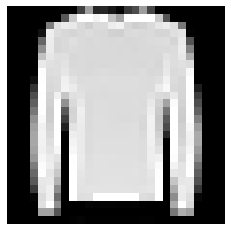

In [15]:
# Some examples
plt.imshow(x_train[4].reshape(28,28),cmap="gray")
plt.axis("off")
plt.show()

<a id="5"></a>
## Convolutional Neural Network 

## Implementing with Keras

In [16]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix

from keras.models import Sequential, model_from_json
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.optimizers import RMSprop,Adam
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

model = Sequential()

#1. LAYER
model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Activation("relu"))

# the model is incomplete, you need to add more layers here!

#FULLY CONNECTED LAYER
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.25))

#OUTPUT LAYER
model.add(Dense(10, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0

<a id="6"></a>
### Define Optimizer   
* **Adam optimizer: Change the learning rate**

In [18]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [19]:
# # Define the optimizer
# optimizer = RMSprop(lr = 0.001, rho=0.9, epsilon=1e-08, decay=0.0)

<a id="7"></a>
### Compile Model
* **Categorical crossentropy**
* **We make binary cross entropy at previous parts and in machine learning tutorial**
* **At this time we use categorical crossentropy. That means that we have multiclass**
 <a href="https://ibb.co/jm1bpp"><img src="https://preview.ibb.co/nN3ZaU/cce.jpg" alt="cce" border="0"></a>

In [20]:
# Compile the model
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

<a id="8"></a>
### Epochs and Batch Size

In [21]:
epochs = 5 # for better result increase the epochs
batch_size = 100

<a id="9"></a>
### Data Augmentation

In [22]:
# Perform Data Augmentation here

<a id="10"></a>
### Fit the Model

In [23]:
# # save the best weights
# checkpointer = ModelCheckpoint(filepath="../yourPath/fashion_mnist_model.h5", verbose=1, save_best_only=True)

In [24]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                              shuffle=True, #veriler random gelip eğitilir
                              epochs=epochs, validation_data = (x_val, y_val),
                              verbose = 2, steps_per_epoch=x_train.shape[0] // batch_size)
#                               callbacks=[checkpointer]) #we save the best weights with checkpointer

Epoch 1/5
540/540 - 98s - loss: 0.4990 - accuracy: 0.8137 - val_loss: 0.3392 - val_accuracy: 0.8765
Epoch 2/5
540/540 - 98s - loss: 0.3522 - accuracy: 0.8701 - val_loss: 0.3876 - val_accuracy: 0.8552
Epoch 3/5
540/540 - 93s - loss: 0.3094 - accuracy: 0.8854 - val_loss: 0.2754 - val_accuracy: 0.8957
Epoch 4/5
540/540 - 93s - loss: 0.2855 - accuracy: 0.8940 - val_loss: 0.2472 - val_accuracy: 0.9093
Epoch 5/5
540/540 - 93s - loss: 0.2686 - accuracy: 0.9005 - val_loss: 0.2574 - val_accuracy: 0.9055


In [25]:
# # save model to json
# model_json = model.to_json() #fashion_mnist_model.h5 - I saved the file in JSON format.
# with open("../yourPath/fashion_mnist_model.json", "w") as json_file:
#     json_file.write(model_json)

In [26]:
# # load the best weights which we saved
# model_best = load_model("../yourPath/fashion_mnist_model.h5")

<a id="11"></a>
## Evaluate the model
* **Validation and Loss visualization**

In [28]:
# Plot the Loss and Accuracy of training Set here

In [ ]:
#print Train accuracy of the model

In [ ]:
#print Train loss of the model

In [ ]:
#print Validation accuracy of the model

In [ ]:
#print Validation loss of the model

In [ ]:
'''score = model.evaluate(X_test,Y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])'''

<a id="14"></a>
### Confusion Matrix

In [29]:
#Plot the confusion matrix here#